In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Passages aux urgences et Actes SOS Médecins (Département)
data = pd.read_csv('https://odisse.santepubliquefrance.fr/api/explore/v2.1/catalog/datasets/grippe-passages-aux-urgences-et-actes-sos-medecins-departement/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%2C')

In [ ]:
# Couvertures vaccinales des adolescents et adultes depuis 2011 (Département)
data_couv = pd.read_csv('https://odisse.santepubliquefrance.fr/api/explore/v2.1/catalog/datasets/couvertures-vaccinales-des-adolescent-et-adultes-departement/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%2C')

In [ ]:
data

,1er jour de la semaine,Semaine,Département Code,Département,Classe d'âge,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Taux d'actes médicaux SOS médecins pour grippe,Région,Région Code
0,2020-12-21,2020-S52,61,Orne,05-14 ans,0.000000,0.000000,NaN,Normandie,28
1,2020-12-21,2020-S52,61,Orne,65 ans ou plus,0.000000,0.000000,NaN,Normandie,28
2,2020-12-28,2020-S53,61,Orne,00-04 ans,500.000000,0.000000,NaN,Normandie,28
3,2020-12-28,2020-S53,61,Orne,65 ans ou plus,257.069409,526.315789,NaN,Normandie,28
4,2020-12-28,2020-S53,61,Orne,Tous âges,145.878920,270.270270,NaN,Normandie,28
...,...,...,...,...,...,...,...,...,...,...
157035,2025-04-28,2025-S18,971,Guadeloupe,15-64 ans,702.106319,0.000000,NaN,Guadeloupe,1
157036,2025-04-28,2025-S18,971,Guadeloupe,65 ans ou plus,652.173913,819.672131,NaN,Guadeloupe,1
157037,2025-05-05,2025-S19,971,Guadeloupe,00-04 ans,1809.954751,4545.454545,NaN,Guadeloupe,1
157038,2025-05-05,2025-S19,971,Guadeloupe,05-14 ans,0.000000,0.000000,NaN,Guadeloupe,1


In [ ]:
data.describe()

,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Taux d'actes médicaux SOS médecins pour grippe,Région Code
count,151618.000000,149683.000000,68798.000000,157040.000000
mean,657.284538,509.498379,3481.876183,79.307692
std,1664.844144,1945.876379,5840.741944,157.132615
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,27.000000
50%,56.785917,0.000000,1071.428571,52.500000
75%,447.093890,0.000000,3985.507246,76.000000
max,28865.979381,100000.000000,100000.000000,978.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157040 entries, 0 to 157039
Data columns (total 10 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   1er jour de la semaine                                           157040 non-null  object 
 1   Semaine                                                          157040 non-null  object 
 2   Département Code                                                 157040 non-null  object 
 3   Département                                                      157040 non-null  object 
 4   Classe d'âge                                                     157040 non-null  object 
 5   Taux de passages aux urgences pour grippe                        151618 non-null  float64
 6   Taux d'hospitalisations après passages aux urgences pour grippe  149683 non-null  float64
 7   Taux d'actes médicaux SOS méd

In [ ]:
data.isna().sum()

,0
1er jour de la semaine,0
Semaine,0
Département Code,0
Département,0
Classe d'âge,0
Taux de passages aux urgences pour grippe,5422
Taux d'hospitalisations après passages aux urgences pour grippe,7357
Taux d'actes médicaux SOS médecins pour grippe,88242
Région,0
Région Code,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departements = gpd.read_file(url)

In [ ]:
merged = departements.merge(data, left_on='code', right_on='Département Code', how='right')

In [ ]:
merged

,code,nom,geometry,1er jour de la semaine,Semaine,Département Code,Département,Classe d'âge,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Taux d'actes médicaux SOS médecins pour grippe,Région,Région Code
0,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,05-14 ans,0.000000,0.000000,NaN,Normandie,28
1,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,65 ans ou plus,0.000000,0.000000,NaN,Normandie,28
2,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,00-04 ans,500.000000,0.000000,NaN,Normandie,28
3,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,65 ans ou plus,257.069409,526.315789,NaN,Normandie,28
4,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,Tous âges,145.878920,270.270270,NaN,Normandie,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157035,NaN,NaN,None,2025-04-28,2025-S18,971,Guadeloupe,15-64 ans,702.106319,0.000000,NaN,Guadeloupe,1
157036,NaN,NaN,None,2025-04-28,2025-S18,971,Guadeloupe,65 ans ou plus,652.173913,819.672131,NaN,Guadeloupe,1
157037,NaN,NaN,None,2025-05-05,2025-S19,971,Guadeloupe,00-04 ans,1809.954751,4545.454545,NaN,Guadeloupe,1
157038,NaN,NaN,None,2025-05-05,2025-S19,971,Guadeloupe,05-14 ans,0.000000,0.000000,NaN,Guadeloupe,1


In [ ]:
merged['Taux de passages aux urgences pour grippe (%)'] = merged['Taux de passages aux urgences pour grippe']/100
merged["Taux d'hospitalisations après passages aux urgences pour grippe (%)"] = merged["Taux d'hospitalisations après passages aux urgences pour grippe"]/100
merged["Taux d'actes médicaux SOS médecins pour grippe (%)"] = merged["Taux d'actes médicaux SOS médecins pour grippe"]/100


In [ ]:
merged

,code,nom,geometry,1er jour de la semaine,Semaine,Département Code,Département,Classe d'âge,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Taux d'actes médicaux SOS médecins pour grippe,Région,Région Code,Taux de passages aux urgences pour grippe (%),Taux d'hospitalisations après passages aux urgences pour grippe (%),Taux d'actes médicaux SOS médecins pour grippe (%)
0,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,05-14 ans,0.000000,0.000000,NaN,Normandie,28,0.000000,0.000000,NaN
1,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,65 ans ou plus,0.000000,0.000000,NaN,Normandie,28,0.000000,0.000000,NaN
2,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,00-04 ans,500.000000,0.000000,NaN,Normandie,28,5.000000,0.000000,NaN
3,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,65 ans ou plus,257.069409,526.315789,NaN,Normandie,28,2.570694,5.263158,NaN
4,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,Tous âges,145.878920,270.270270,NaN,Normandie,28,1.458789,2.702703,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157035,NaN,NaN,None,2025-04-28,2025-S18,971,Guadeloupe,15-64 ans,702.106319,0.000000,NaN,Guadeloupe,1,7.021063,0.000000,NaN
157036,NaN,NaN,None,2025-04-28,2025-S18,971,Guadeloupe,65 ans ou plus,652.173913,819.672131,NaN,Guadeloupe,1,6.521739,8.196721,NaN
157037,NaN,NaN,None,2025-05-05,2025-S19,971,Guadeloupe,00-04 ans,1809.954751,4545.454545,NaN,Guadeloupe,1,18.099548,45.454545,NaN
157038,NaN,NaN,None,2025-05-05,2025-S19,971,Guadeloupe,05-14 ans,0.000000,0.000000,NaN,Guadeloupe,1,0.000000,0.000000,NaN


In [ ]:
merge_drop = merged.drop(['Taux de passages aux urgences pour grippe', 'Taux d\'hospitalisations après passages aux urgences pour grippe', 'Taux d\'actes médicaux SOS médecins pour grippe', 'code', 'nom'], axis=1)

In [ ]:
merge_drop

,geometry,1er jour de la semaine,Semaine,Département Code,Département,Classe d'âge,Région,Région Code,Taux de passages aux urgences pour grippe (%),Taux d'hospitalisations après passages aux urgences pour grippe (%),Taux d'actes médicaux SOS médecins pour grippe (%)
0,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,05-14 ans,Normandie,28,0.000000,0.000000,NaN
1,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,65 ans ou plus,Normandie,28,0.000000,0.000000,NaN
2,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,00-04 ans,Normandie,28,5.000000,0.000000,NaN
3,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,65 ans ou plus,Normandie,28,2.570694,5.263158,NaN
4,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,Tous âges,Normandie,28,1.458789,2.702703,NaN
...,...,...,...,...,...,...,...,...,...,...,...
157035,None,2025-04-28,2025-S18,971,Guadeloupe,15-64 ans,Guadeloupe,1,7.021063,0.000000,NaN
157036,None,2025-04-28,2025-S18,971,Guadeloupe,65 ans ou plus,Guadeloupe,1,6.521739,8.196721,NaN
157037,None,2025-05-05,2025-S19,971,Guadeloupe,00-04 ans,Guadeloupe,1,18.099548,45.454545,NaN
157038,None,2025-05-05,2025-S19,971,Guadeloupe,05-14 ans,Guadeloupe,1,0.000000,0.000000,NaN


In [ ]:
merge_drop['1er jour de la semaine'] = pd.to_datetime(merge_drop['1er jour de la semaine'])

In [ ]:
merge_drop

,geometry,1er jour de la semaine,Semaine,Département Code,Département,Classe d'âge,Région,Région Code,Taux de passages aux urgences pour grippe (%),Taux d'hospitalisations après passages aux urgences pour grippe (%),Taux d'actes médicaux SOS médecins pour grippe (%)
0,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,05-14 ans,Normandie,28,0.000000,0.000000,NaN
1,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,65 ans ou plus,Normandie,28,0.000000,0.000000,NaN
2,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,00-04 ans,Normandie,28,5.000000,0.000000,NaN
3,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,65 ans ou plus,Normandie,28,2.570694,5.263158,NaN
4,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,Tous âges,Normandie,28,1.458789,2.702703,NaN
...,...,...,...,...,...,...,...,...,...,...,...
157035,None,2025-04-28,2025-S18,971,Guadeloupe,15-64 ans,Guadeloupe,1,7.021063,0.000000,NaN
157036,None,2025-04-28,2025-S18,971,Guadeloupe,65 ans ou plus,Guadeloupe,1,6.521739,8.196721,NaN
157037,None,2025-05-05,2025-S19,971,Guadeloupe,00-04 ans,Guadeloupe,1,18.099548,45.454545,NaN
157038,None,2025-05-05,2025-S19,971,Guadeloupe,05-14 ans,Guadeloupe,1,0.000000,0.000000,NaN


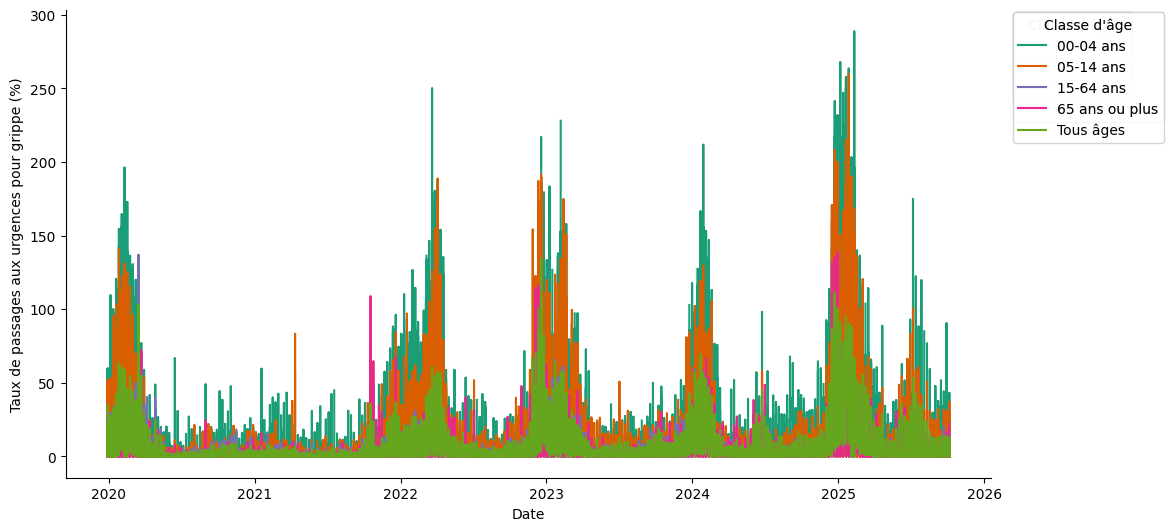

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['1er jour de la semaine']
  ys = series['Taux de passages aux urgences pour grippe (%)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merge_drop.sort_values('1er jour de la semaine', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby("Classe d'âge")):
  _plot_series(series, series_name, i)
  fig.legend(title="Classe d'âge", bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Taux de passages aux urgences pour grippe (%)')

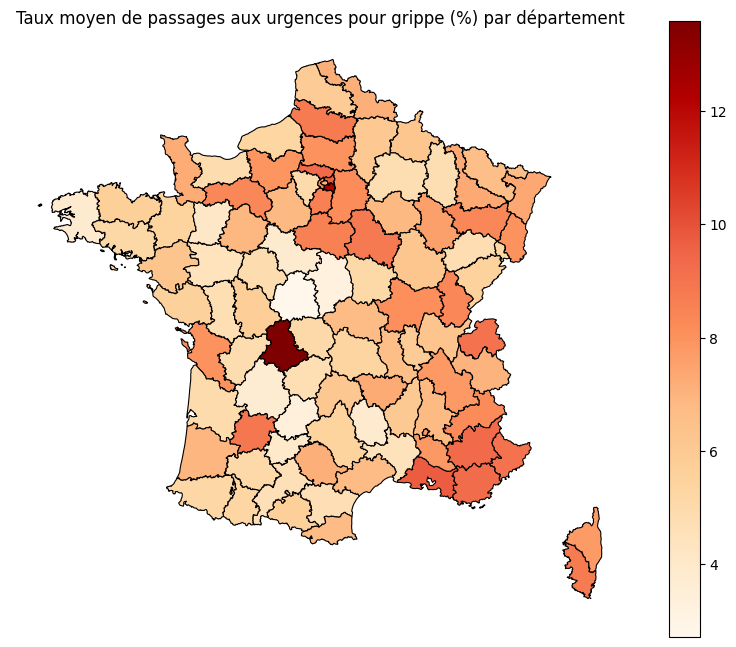

In [ ]:
gdf = gpd.GeoDataFrame(merge_drop, geometry='geometry')

agg = gdf.groupby(['Département', 'geometry'])['Taux de passages aux urgences pour grippe (%)'].mean().reset_index()

agg_gdf = gpd.GeoDataFrame(agg, geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
agg_gdf.plot(column='Taux de passages aux urgences pour grippe (%)',
             cmap='OrRd',
             linewidth=0.8,
             edgecolor='black',
             legend=True,
             ax=ax)

ax.set_title("Taux moyen de passages aux urgences pour grippe (%) par département")
ax.set_axis_off()
plt.show()


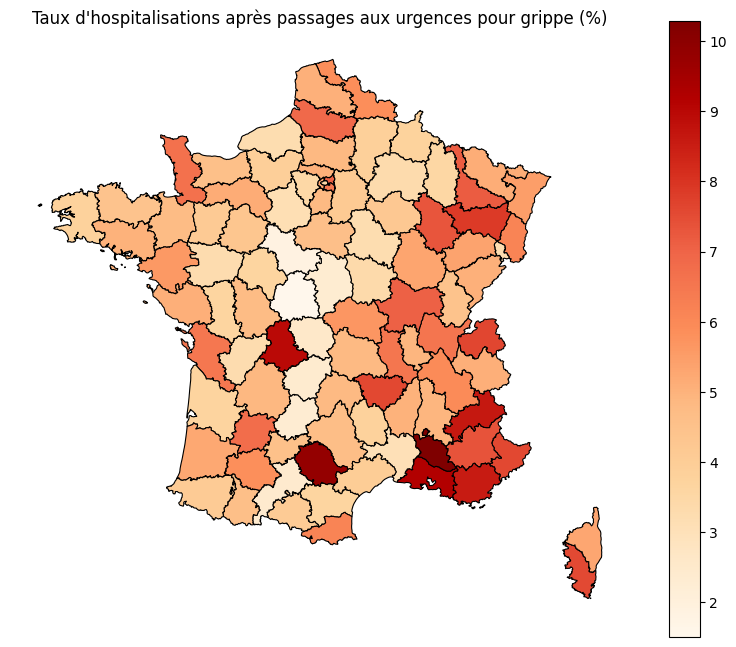

In [ ]:
gdf = gpd.GeoDataFrame(merge_drop, geometry='geometry')

agg = gdf.groupby(['Département', 'geometry'])["Taux d'hospitalisations après passages aux urgences pour grippe (%)"].mean().reset_index()

agg_gdf = gpd.GeoDataFrame(agg, geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
agg_gdf.plot(column="Taux d'hospitalisations après passages aux urgences pour grippe (%)",
             cmap='OrRd',
             linewidth=0.8,
             edgecolor='black',
             legend=True,
             ax=ax)

ax.set_title("Taux d'hospitalisations après passages aux urgences pour grippe (%)")
ax.set_axis_off()
plt.show()

In [ ]:
merge_drop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 157040 entries, 0 to 157039
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count   Dtype         
---  ------                                                               --------------   -----         
 0   geometry                                                             144960 non-null  geometry      
 1   1er jour de la semaine                                               157040 non-null  datetime64[ns]
 2   Semaine                                                              157040 non-null  object        
 3   Département Code                                                     157040 non-null  object        
 4   Département                                                          157040 non-null  object        
 5   Classe d'âge                                                         157040 non-null  object        
 6   Région                      

In [ ]:
merge_drop.isna().sum()

,0
geometry,12080
1er jour de la semaine,0
Semaine,0
Département Code,0
Département,0
Classe d'âge,0
Région,0
Région Code,0
Taux de passages aux urgences pour grippe (%),5422
Taux d'hospitalisations après passages aux urgences pour grippe (%),7357


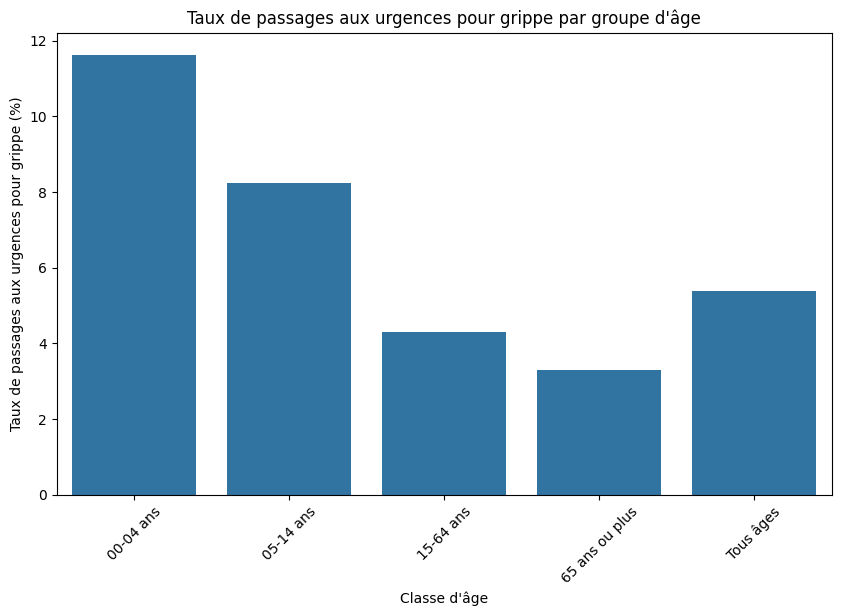

In [ ]:
# Analyser le taux de passages aux urgences pour grippe par classe d'âge
age_group_analysis = merge_drop.groupby('Classe d\'âge')['Taux de passages aux urgences pour grippe (%)'].mean().reset_index()

# Visualiser par groupe d'âge
plt.figure(figsize=(10, 6))
sns.barplot(x='Classe d\'âge', y='Taux de passages aux urgences pour grippe (%)', data=age_group_analysis)
plt.title('Taux de passages aux urgences pour grippe par groupe d\'âge')
plt.xticks(rotation=45)
plt.show()


In [ ]:
age_group_analysis_2 = merge_drop.groupby('Classe d\'âge')["Taux d'hospitalisations après passages aux urgences pour grippe (%)"].mean().reset_index()

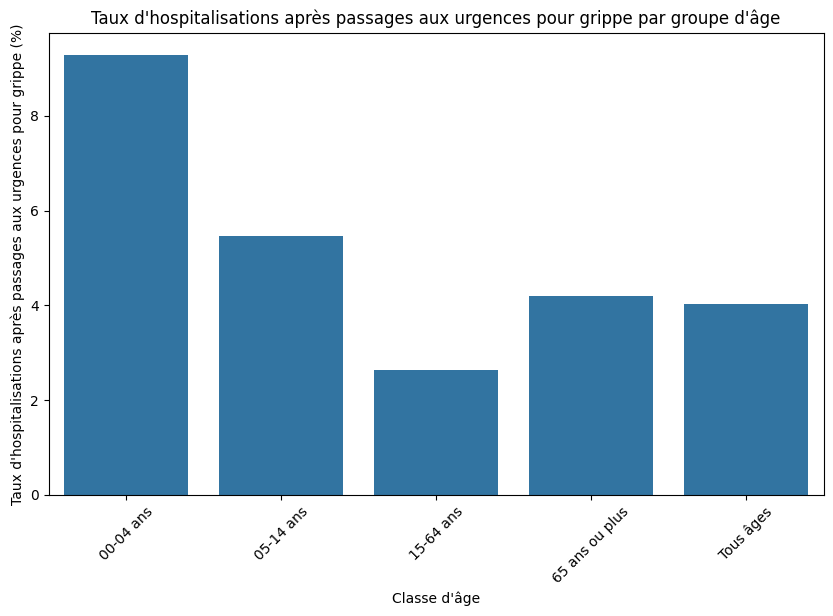

In [ ]:
# Visualiser par groupe d'âge
plt.figure(figsize=(10, 6))
sns.barplot(x='Classe d\'âge', y="Taux d'hospitalisations après passages aux urgences pour grippe (%)", data=age_group_analysis_2)
plt.title("Taux d'hospitalisations après passages aux urgences pour grippe par groupe d\'âge")
plt.xticks(rotation=45)
plt.show()

In [ ]:

df_clean = merge_drop.dropna(subset=['Taux de passages aux urgences pour grippe (%)', "Taux d'hospitalisations après passages aux urgences pour grippe (%)"]).reset_index()



In [ ]:
df_clean

,index,geometry,1er jour de la semaine,Semaine,Département Code,Département,Classe d'âge,Région,Région Code,Taux de passages aux urgences pour grippe (%),Taux d'hospitalisations après passages aux urgences pour grippe (%),Taux d'actes médicaux SOS médecins pour grippe (%)
0,0,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,05-14 ans,Normandie,28,0.000000,0.000000,NaN
1,1,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,65 ans ou plus,Normandie,28,0.000000,0.000000,NaN
2,2,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,00-04 ans,Normandie,28,5.000000,0.000000,NaN
3,3,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,65 ans ou plus,Normandie,28,2.570694,5.263158,NaN
4,4,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,Tous âges,Normandie,28,1.458789,2.702703,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149678,157035,None,2025-04-28,2025-S18,971,Guadeloupe,15-64 ans,Guadeloupe,1,7.021063,0.000000,NaN
149679,157036,None,2025-04-28,2025-S18,971,Guadeloupe,65 ans ou plus,Guadeloupe,1,6.521739,8.196721,NaN
149680,157037,None,2025-05-05,2025-S19,971,Guadeloupe,00-04 ans,Guadeloupe,1,18.099548,45.454545,NaN
149681,157038,None,2025-05-05,2025-S19,971,Guadeloupe,05-14 ans,Guadeloupe,1,0.000000,0.000000,NaN


In [ ]:
# Suppression des lignes où la cible (taux de passages aux urgences) est NaN
df_clean = df_clean.dropna(subset=['Taux de passages aux urgences pour grippe (%)'])

# Extraire les informations de la date (année, mois, semaine, jour, etc.)
df_clean['year'] = df_clean['1er jour de la semaine'].dt.year
df_clean['month'] = df_clean['1er jour de la semaine'].dt.month
df_clean['week'] = df_clean['1er jour de la semaine'].dt.isocalendar().week
df_clean['day'] = df_clean['1er jour de la semaine'].dt.day


In [ ]:
df_clean

,index,geometry,1er jour de la semaine,Semaine,Département Code,Département,Classe d'âge,Région,Région Code,Taux de passages aux urgences pour grippe (%),Taux d'hospitalisations après passages aux urgences pour grippe (%),Taux d'actes médicaux SOS médecins pour grippe (%),year,month,week,day
0,0,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,05-14 ans,Normandie,28,0.000000,0.000000,NaN,2020,12,52,21
1,1,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-21,2020-S52,61,Orne,65 ans ou plus,Normandie,28,0.000000,0.000000,NaN,2020,12,52,21
2,2,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,00-04 ans,Normandie,28,5.000000,0.000000,NaN,2020,12,53,28
3,3,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,65 ans ou plus,Normandie,28,2.570694,5.263158,NaN,2020,12,53,28
4,4,"POLYGON ((-0.84094 48.75222, -0.81864 48.7548,...",2020-12-28,2020-S53,61,Orne,Tous âges,Normandie,28,1.458789,2.702703,NaN,2020,12,53,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149678,157035,None,2025-04-28,2025-S18,971,Guadeloupe,15-64 ans,Guadeloupe,1,7.021063,0.000000,NaN,2025,4,18,28
149679,157036,None,2025-04-28,2025-S18,971,Guadeloupe,65 ans ou plus,Guadeloupe,1,6.521739,8.196721,NaN,2025,4,18,28
149680,157037,None,2025-05-05,2025-S19,971,Guadeloupe,00-04 ans,Guadeloupe,1,18.099548,45.454545,NaN,2025,5,19,5
149681,157038,None,2025-05-05,2025-S19,971,Guadeloupe,05-14 ans,Guadeloupe,1,0.000000,0.000000,NaN,2025,5,19,5


In [ ]:
df_clean.describe()

,index,1er jour de la semaine,Région Code,Taux de passages aux urgences pour grippe (%),Taux d'hospitalisations après passages aux urgences pour grippe (%),Taux d'actes médicaux SOS médecins pour grippe (%),year,month,week,day
count,149683.000000,149683,149683.000000,149683.000000,149683.000000,67842.000000,149683.000000,149683.000000,149683.0,149683.000000
mean,78456.387238,2022-11-22 05:30:25.770461440,52.893969,6.600311,5.094984,35.027044,2022.406686,6.344769,25.857572,15.782581
min,0.000000,2019-12-30 00:00:00,1.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.0,1.000000
25%,39267.500000,2021-06-14 00:00:00,27.000000,0.000000,0.000000,0.000000,2021.000000,3.000000,13.0,8.000000
50%,78603.000000,2022-11-21 00:00:00,52.000000,0.597729,0.000000,10.869565,2022.000000,6.000000,26.0,16.000000
75%,117938.500000,2024-05-06 00:00:00,76.000000,4.524887,0.000000,40.000000,2024.000000,9.000000,38.0,23.000000
max,157039.000000,2025-10-06 00:00:00,94.000000,288.659794,1000.000000,1000.000000,2025.000000,12.000000,53.0,31.000000
std,45347.301285,NaN,28.080486,16.670351,19.458764,58.635416,1.674034,3.388142,14.784493,8.824467


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Créer des instances de LabelEncoder (factorize et getdummies pas top)
region_encoder = LabelEncoder()
departement_encoder = LabelEncoder()
classe_age_encoder = LabelEncoder()

# Appliquer LabelEncoder aux colonnes 'Région', 'Département', et 'Classe d'âge'
df_clean['Région_code'] = region_encoder.fit_transform(df_clean['Région'])
df_clean['Département_code'] = departement_encoder.fit_transform(df_clean['Département'])
df_clean['Classe_d_age_code'] = classe_age_encoder.fit_transform(df_clean['Classe d\'âge'])


print(df_clean[['Région', 'Région_code', 'Département', 'Département_code', 'Classe d\'âge', 'Classe_d_age_code']].head())


      Région  Région_code Département  Département_code    Classe d'âge  \
0  Normandie           11        Orne                74       05-14 ans   
1  Normandie           11        Orne                74  65 ans ou plus   
2  Normandie           11        Orne                74       00-04 ans   
3  Normandie           11        Orne                74  65 ans ou plus   
4  Normandie           11        Orne                74       Tous âges   

   Classe_d_age_code  
0                  1  
1                  3  
2                  0  
3                  3  
4                  4  


In [ ]:
X = df_clean[['month', 'Département_code', 'Classe_d_age_code']]
y = df_clean['Taux de passages aux urgences pour grippe (%)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# modèle de régression linéaire
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE) et le coefficient de détermination R²
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error) : {rmse:.2f}")
print(f"R² (Coefficient de détermination) : {r2:.2f}")

RMSE (Root Mean Squared Error) : 262.13
R² (Coefficient de détermination) : 0.06


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = model_rf.predict(X_test)

# Calcul des erreurs
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE (Random Forest) : {rmse_rf:.2f}")
print(f"R² (Random Forest) : {r2_rf:.2f}")


RMSE (Random Forest) : 14.08
R² (Random Forest) : 0.29


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Appliquer le meilleur modèle trouvé
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Calculer la RMSE et le R² pour le modèle optimisé
rmse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"RMSE (Random Forest Optimisé) : {rmse_best:.2f}")
print(f"R² (Random Forest Optimisé) : {r2_best:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Meilleurs paramètres : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}
RMSE (Random Forest Optimisé) : 194.70
R² (Random Forest Optimisé) : 0.30


In [ ]:
from xgboost import XGBRegressor

# Modèle XGBoost
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE (XGBoost) : {rmse_xgb:.2f}")
print(f"R² (XGBoost) : {r2_xgb:.2f}")


RMSE (XGBoost) : 196.14
R² (XGBoost) : 0.30


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Meilleurs paramètres : {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}


In [ ]:
# Comparer les taux de passages aux urgences avant et après une intervention
before_intervention = merge_drop[merge_drop['1er jour de la semaine'] < '2025-01-28']
after_intervention = merge_drop[merge_drop['1er jour de la semaine'] >= '2025-01-28']

# Calculer la moyenne des Taux d'hospitalisations après passages aux urgences pour grippe (%) pour chaque période
before_mean = before_intervention['Taux de passages aux urgences pour grippe (%)'].mean()
after_mean = after_intervention['Taux de passages aux urgences pour grippe (%)'].mean()

print(f"Moyenne avant intervention : {before_mean:.2f}")
print(f"Moyenne après intervention : {after_mean:.2f}")

Moyenne avant intervention : 6.57
Moyenne après intervention : 6.56


In [ ]:
# Comparer les Taux d'hospitalisations après passages aux urgences pour grippe (%) avant et après une intervention
before_intervention = merge_drop[merge_drop['1er jour de la semaine'] < '2025-01-28']
after_intervention = merge_drop[merge_drop['1er jour de la semaine'] >= '2025-01-28']

# Calculer la moyenne des taux Taux d'hospitalisations après passages aux urgences pour grippe (%) pour chaque période
before_mean = before_intervention["Taux d'hospitalisations après passages aux urgences pour grippe (%)"].mean()
after_mean = after_intervention["Taux d'hospitalisations après passages aux urgences pour grippe (%)"].mean()

print(f"Moyenne avant intervention : {before_mean:.2f}")
print(f"Moyenne après intervention : {after_mean:.2f}")


Moyenne avant intervention : 5.07
Moyenne après intervention : 5.28


In [ ]:
data_couv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Année                            1414 non-null   int64  
 1   Département Code                 1414 non-null   object 
 2   Département                      1414 non-null   object 
 3   HPV filles 1 dose à 15 ans       1380 non-null   float64
 4   HPV filles 2 doses à 16 ans      1380 non-null   float64
 5   HPV garçons 1 dose à 15 ans      300 non-null    float64
 6   HPV garçons 2 doses à 16 ans     300 non-null    float64
 7   Méningocoque C 10-14 ans         1086 non-null   float64
 8   Méningocoque C 15-19 ans         1057 non-null   float64
 9   Méningocoque C 20-24 ans         96 non-null     float64
 10  Grippe moins de 65 ans à risque  888 non-null    float64
 11  Grippe 65 ans et plus            888 non-null    float64
 12  Grippe 65-74 ans    

In [ ]:
data_couv

,Année,Département Code,Département,HPV filles 1 dose à 15 ans,HPV filles 2 doses à 16 ans,HPV garçons 1 dose à 15 ans,HPV garçons 2 doses à 16 ans,Méningocoque C 10-14 ans,Méningocoque C 15-19 ans,Méningocoque C 20-24 ans,Grippe moins de 65 ans à risque,Grippe 65 ans et plus,Grippe 65-74 ans,Grippe 75 ans et plus,Covid-19 65 ans et plus,Région,Région Code
0,2011,3,Allier,33.7,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auvergne et Rhône-Alpes,84
1,2011,6,Alpes-Maritimes,30.8,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provence-Alpes-Côte d'Azur,93
2,2011,7,Ardèche,23.7,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auvergne et Rhône-Alpes,84
3,2011,17,Charente-Maritime,33.6,32.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nouvelle Aquitaine,75
4,2011,23,Creuse,32.2,29.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nouvelle Aquitaine,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2024,87,Haute-Vienne,67.7,56.8,42.0,30.3,80.6,NaN,NaN,29.0,57.1,50.8,63.0,NaN,Nouvelle Aquitaine,75
1410,2024,91,Essonne,49.6,41.2,33.1,21.4,73.6,54.2,32.6,23.0,55.5,47.7,63.4,NaN,Île-de-France,11
1411,2024,93,Seine-Saint-Denis,31.7,22.3,16.9,9.3,73.1,58.3,32.8,19.5,43.8,37.6,51.6,NaN,Île-de-France,11
1412,2024,95,Val-d'Oise,41.9,33.3,24.3,15.1,77.3,59.1,36.4,20.1,50.8,43.9,58.8,NaN,Île-de-France,11
